In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data,columns=cancer.feature_names)

df['target'] = cancer.target

df.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
336,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,0.07238,...,16.91,87.38,576.0,0.1142,0.1975,0.145,0.0585,0.2432,0.1009,1


In [5]:
X = df.drop('target',axis=1)
y = df['target']

In [6]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [15]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred_rf = rf_model.predict(X_test)

In [19]:
y_pred_rf

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [20]:
print('Accuracy',accuracy_score(y_test,y_pred_rf))

Accuracy 0.9649122807017544


In [21]:
print(confusion_matrix(y_test,y_pred_rf))

[[40  3]
 [ 1 70]]


In [22]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [25]:
ada_model = AdaBoostClassifier(n_estimators=100,random_state=42)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [26]:
y_pred_ada = ada_model.predict(X_test)

In [27]:
y_pred_ada

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [34]:
print(accuracy_score(y_test,y_pred_ada))

0.9736842105263158


In [35]:
gb_model = GradientBoostingClassifier(n_estimators=100,random_state=42)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [36]:
y_pred_gb = gb_model.predict(X_test)
y_pred_gb

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [37]:
print(accuracy_score(y_test,y_pred_gb))

0.956140350877193


In [38]:
print(confusion_matrix(y_test,y_pred_gb))

[[40  3]
 [ 2 69]]


In [47]:
model = ['RF','ADA','GB']

score = [accuracy_score(y_test,y_pred_rf),
      accuracy_score(y_test,y_pred_ada),
      accuracy_score(y_test,y_pred_gb)
      ]
model_per = dict(zip(model,score))
model_per_df = pd.DataFrame(model_per,index=[1])
model_per_df

,RF,ADA,GB
1,0.964912,0.973684,0.95614


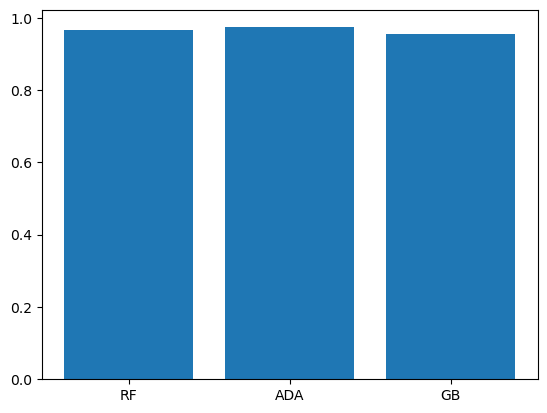

In [46]:
plt.bar(model,score)
plt.show()

<Axes: >

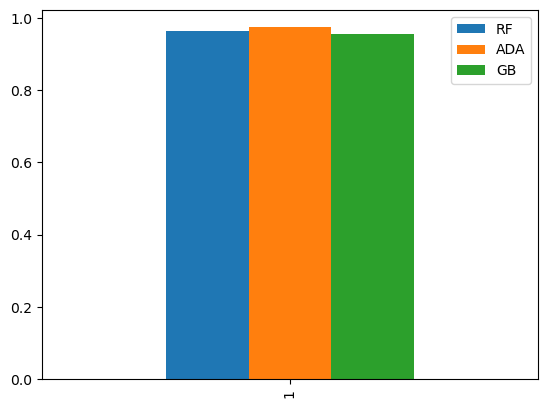

In [48]:
model_per_df.plot(kind='bar')